### Network Analysis in Python I


__insights__

    important entities - influenceers in social network
    pathfinding - most efficient transport path    
    clustering - finding simlarities or communities

__Network Structure__

    talks aboout nodes between him and his friend hugo. some meta data - age, date met, etc.
    they are connected by the friendship line

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import networkx as nx

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3])

G.nodes()

[1, 2, 3]

In [3]:
G.add_edge(1,2)
G.edges()

[(1, 2)]

In [4]:
## Can store the meta data directly as well

G.node[1]['label'] = 'blue'
G.nodes(data=True)

[(1, {'label': 'blue'}), (2, {}), (3, {})]

C:\Users\SchillW\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\SchillW\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\SchillW\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\SchillW\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be re

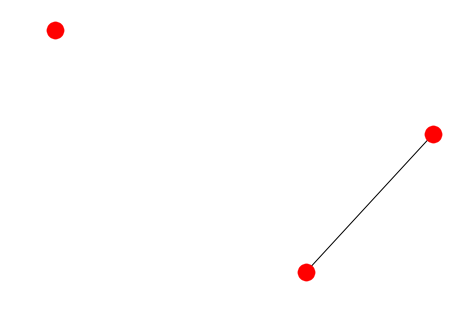

In [5]:
## Basic Drawing Functionality
from matplotlib.pyplot import *
%matplotlib inline
nx.draw(G)
show()

#### QUERIES IN A GRAPH

In [6]:
## this is all using some twitter data as specified in the course...

In [7]:
T = nx.read_gpickle('ego-twitter.p')

In [9]:
T.edges()[:10]

[(1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12)]

In [10]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010,1,1)]

[ _output expression_ for _iterator variable_ in _iterable_ if _predicate expression_ ].

### Types of Graphs

In [11]:
## specifying weight on edges
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1

In [12]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

### Network Visualization


__MATRIX PLOTS__ - nodes are rows and columns, diagonals are edges of the graph

directed grapsh do not have symmetrical representations as a matrix, undirected are symmetrical along the main diag

__ARC PLOTS__ - good starting point to form basis

__CIRCOS PLOTS__ - tranform of arc plot (original design for genomics)

nxviz API

In [13]:
# # Import nxviz
# import nxviz as nv
# import matplotlib.pyplot as plt

# # Create the MatrixPlot object: m
# m = nv.MatrixPlot(T)

# # Draw m to the screen
# m.draw()

# # Display the plot
# plt.show()

# # Convert T to a matrix format: A
# A = nx.to_numpy_matrix(T)

# # Convert A back to the NetworkX form as a directed graph: T_conv
# T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# # Check that the `category` metadata field is lost from each node
# for n, d in T_conv.nodes(data=True):
#     assert 'category' not in d.keys()

In [14]:
# # Import necessary modules
# import matplotlib.pyplot as plt
# from nxviz import CircosPlot

# # Create the CircosPlot object: c
# c = CircosPlot(T)

# # Draw c to the screen
# c.draw()

# # Display the plot
# plt.show()

### Examples

from : https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html

In [15]:
kc = nx.karate_club_graph()
print('Node Degree')
for v in kc:
    print('%s %s' % (v,kc.degree(v)))

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


### Degree Centrality

- degree centrality is a metric to evaluate importance of node

- DOC = number of neighbors / number of all possible neighbors


Exampes of nodes with hgih degree centrality
- twitter brodcasters
- airport transportation hubs
- disease super spreaders

Networx API

In [1]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
        print(n)
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
print(six_nbrs)


NameError: name 'T' is not defined

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(T.neighbors(n)) for n in T.nodes() ]

# Print the degrees
print(degrees)

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

### Graph Algorithms

Path Finding
- optimization of shortest paths
- modeling disease spread

Algorithm: Breadth First Search
- shortest path between two nodes


- check nodes and edges present len(G.nodes) etc.
- G.neghbors list
iteration through G.neighbors(1) to find if end point is there

In [2]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

### Betweenness Centrality

All shortest paths from using breadth first on all nodes.

Betweness Centrality = num of shortest paths through node / all possible shortest paths

- this captures bottleneck nodes in a graph rather than highly connected ones
- bridges betweek libearl and cons twitter users
- bridges for network flow
- singapore stations for transit connection

example with a _barbell graph_

nx.betweenness_centrality

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.figure()
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G, typ="degc"):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    if type != "degc":
        deg_cent = nx.betweenness_centrality(G)
        print("THe option for betweeness centrality has been selected rather than degree centrality")
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

### Cliques and Communities

- social cliques are tightly knit and is defined similarly here
- it is a completely connected graph

- simplest complex clique == TRIANGLE!
- triangel closures if A knows B and B knows C but A and C are not connected but may want to connect

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

In [ ]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

### Maximal Cliques

- a cliqque that when exended by one node is no longer a clique
- applications:
    - community finding
    - a way of indetifying communities is finding all maximal cliques
    
back to the barbell graph, there are 2 maximal cliques connected by another node

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33

### Subgraphs

- visualizing smaller portions of a large graph
    - paths
    - communities/cliques
    - degrees of separation from node
    
suppose we have a graph generated from 

G = nx.erdos_renyi_graph(n=20, p=0.2) ## 20 nodes

what does p do?

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
plt.figure()
nx.draw(T_draw)
plt.show()

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
plt.figure()
nx.draw(T_sub)
plt.show()

The above function drew the whole set of nodes of interest...

### CASE STUDY

Git hub user collab network.

Nodes are users and Edges are collaboration on some github reposoity.

Goals:
- analyze structure
- visualize
- build simple recommendation system

Graph Properties Reminders:
len(G.edges()), len(G.nodes())
- degree centrality and betrweeneness centrality



In [ ]:
## G has been preloaded and we can probably look this up from Git hub or put it in that nx.erdos_ function

G = nx.erdos_renyi_graph(n=100, p=0.1) 

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
doc = (list(nx.degree_centrality(G).values()))
plt.figure()
plt.hist(doc)
plt.show()

# Plot the degree distribution of the GitHub collaboration network
boc = (list(nx.betweenness_centrality(G).values()))
plt.figure()
plt.hist(boc)
plt.show()

### Case Study Part 2: Visualization

circ = nc.CircosPlot(G, node_color='key', node_group='key')

circ.draw()


nxviz API


__Connected Componenet SUbgraphs__
nx.connected_component_subgraphs(G)

list(^^)

In [ ]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs, 'grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)
    
# Create the ArcPlot object: a
a = ArcPlot(G, 'degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G, 'degree', 'grouping','grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

### Case Study Part 3 : Cliques

simplest clique = an edge
simplest conmplex clique = triangle




In [ ]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

In [ ]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

### Case Study Part 4: Final Tasks

- find important github users based on collaborative reln
    - degree centrality
- find largest communities of collaborators
    - maximal clique
- build a collaboration recommendation system
    - open triangles (2 nodes connected to a similar one that are not connected themselves)

In [ ]:
## FINDING IMPORTANT COLLABORATORS

# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

## ['U89']

In [ ]:
## CHARACTERIZING AND EDITING COMMUNITIES
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), node))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()


In [ ]:
## Recommending Co-Editors WHo Have Yet to Come Together
print(str(Recommending Co-Editors WHo Have Yet to Come Together).upper(),'\n\n')

# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


### Final Thoughts

- go do the second part eventually...